In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.datasets import fetch_olivetti_faces

In [2]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces("data")

In [3]:
data

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
X = data.images
Y = data.target

In [5]:
def dataset(X, unique_ids):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18,8))
    axarr=axarr.flatten()
    
    for x in unique_ids:
        image_index=x*10
        axarr[x].imshow(X[image_index], cmap='gray')

        axarr[x].set_title("face id:{}".format(x))
    plt.suptitle("There are 40 distinct people in the dataset")

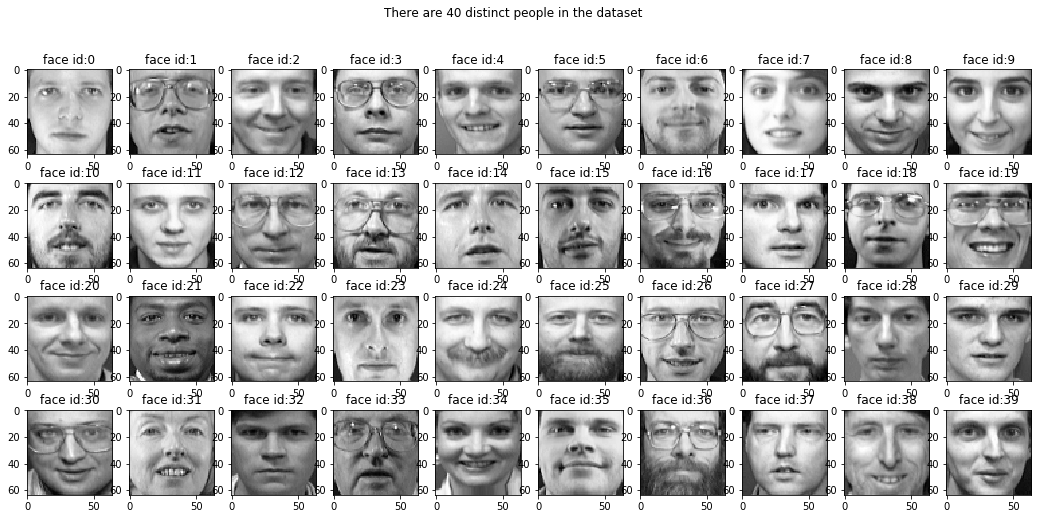

In [6]:
# ******************* for showing all Person  ***********************************


dataset(X, np.unique(Y))

In [7]:

# ******************* for showing all data set ***********************************


#for i in range(0 , 400):
#    pixels = np.array(X[i], dtype='float')
#    pixels = pixels.reshape((64,64))
#    plt.imshow(pixels, cmap='Greys')
#    plt.show()

In [8]:
# ********************* splliting all data set in 320 , 80 **************************


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4)
len(x_train),len(x_test)

(240, 160)

In [10]:
x_train.shape

(240, 64, 64)

In [10]:

# ********************** Building Model *********************************************



model = tf.keras.models.Sequential([
    
    
    tf.keras.layers.Conv2D(8, kernel_size=3, activation='relu', input_shape=(64,64,1)),  
    tf.keras.layers.MaxPool2D(pool_size=(2, 2),),
    
    
    tf.keras.layers.Conv2D(16, kernel_size=3, activation='relu'),  
    tf.keras.layers.MaxPool2D(pool_size=(2, 2),),

    tf.keras.layers.Flatten(),
    
    
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(40, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
    

W0827 08:47:23.708707  7996 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:

# ************************** training model ****************************

model.fit(x_train.reshape(-1,64,64,1),y_train,epochs = 20)

Epoch 1/20
240/240 [==============================] - 0s 2ms/sample - loss: 3.7541 - acc: 0.0167
Epoch 2/20
240/240 [==============================] - 0s 1ms/sample - loss: 3.6438 - acc: 0.0292
Epoch 3/20
240/240 [==============================] - 0s 1ms/sample - loss: 3.5947 - acc: 0.1208
Epoch 4/20
240/240 [==============================] - 0s 1ms/sample - loss: 3.5216 - acc: 0.1292
Epoch 5/20
240/240 [==============================] - 0s 1ms/sample - loss: 3.4152 - acc: 0.2000
Epoch 6/20
240/240 [==============================] - 0s 1ms/sample - loss: 3.2773 - acc: 0.3292
Epoch 7/20
240/240 [==============================] - 0s 1ms/sample - loss: 3.0759 - acc: 0.3292
Epoch 8/20
240/240 [==============================] - 0s 1ms/sample - loss: 2.7690 - acc: 0.4333
Epoch 9/20
240/240 [==============================] - 0s 1ms/sample - loss: 2.4105 - acc: 0.6333
Epoch 10/20
240/240 [==============================] - 0s 1ms/sample - loss: 2.0276 - acc: 0.6375
Epoch 11/20
240/240 [========

In [13]:

# ************************************* Testing Model *************************************

model.evaluate(x_test.reshape(-1,64,64,1),y_test)

160/160 [==============================] - 0s 674us/sample - loss: 0.6206 - acc: 0.8250


[0.6206228017807007, 0.825]

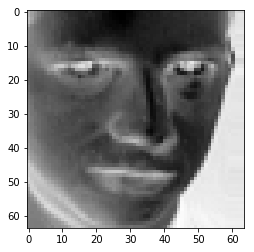

In [25]:

pixels = np.array(X[9], dtype='float')
pixels = pixels.reshape((64,64))
plt.imshow(pixels, cmap='Greys')
plt.show()